# Exemplar: Discover what is in your dataset

In [3]:
# Import libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
companies = pd.read_csv("Unicorn_Companies.csv")

In [30]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


**Question:** What do you think the "Date Joined" column represents?

- The "Date Joined" column represents when the company became a "unicorn," reaching one billion dollars in valuation.

**Question:** What do you think the "Select Investors" column represents?

- The "Select Investors" column represents the top investors in the company.

In [7]:
companies.size

10740

In [8]:
companies.shape

(1074, 10)

In [9]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [10]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [11]:
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

C:\Users\clse5199\AppData\Local\Temp\ipykernel_10136\650040775.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])


In [12]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [13]:
companies["Year Joined"] = companies["Date Joined"].dt.year

In [14]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [25]:
companies_sample = companies.sample(n = 50, random_state = 42)

# Create new `years_till_unicorn` column 
companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "years_till_unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="years_till_unicorn")
          )
grouped

,years_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


Now, create a bar plot.

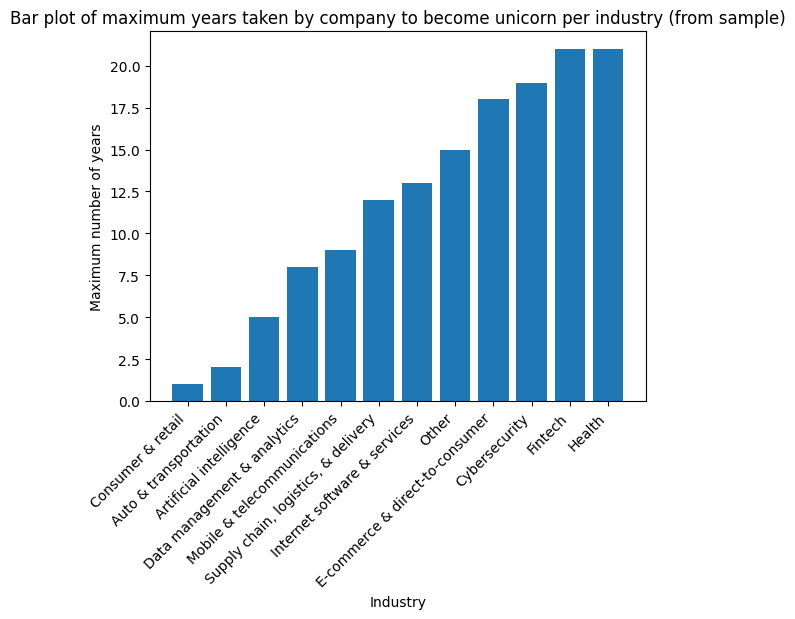

In [26]:
plt.bar(grouped.index, grouped["years_till_unicorn"])
plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum number of years")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Question:** What do you observe from this bar plot?

- This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the Heath and Fintech industries, while the smallest value occurred in the Consumer & Retail industry.

In [27]:
companies_sample['valuation_billions'] = companies_sample['Valuation']
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('$', '')
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('B', '')
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].astype('int')
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


Now, prepare the data for modeling by performing the necessary calculations on it.

In [28]:
# Prepare data for modeling
grouped = (companies_sample[["Industry", "valuation_billions"]]
           .groupby("Industry")
           .max()
           .sort_values(by="valuation_billions")
          )
grouped

,valuation_billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


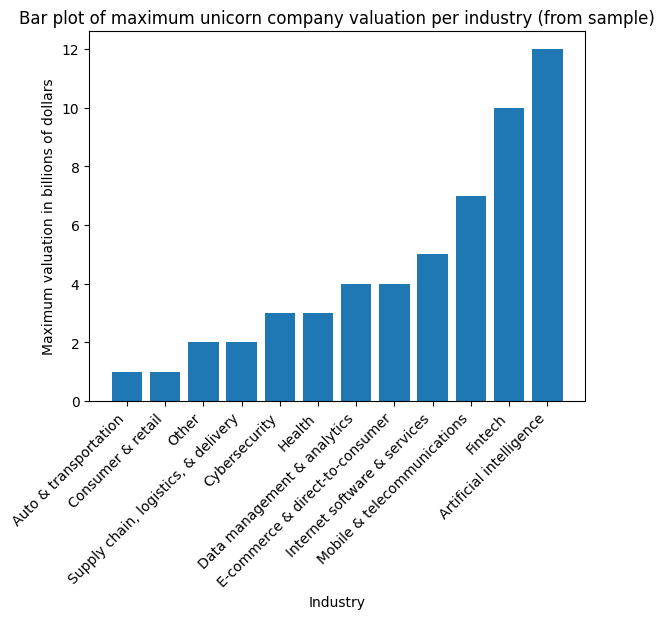

In [29]:
plt.bar(grouped.index, grouped["valuation_billions"])
plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Question:** What do you observe from this bar plot? 

- This bar plot shows that for this sample of unicorn companies, the highest maximum valuation occurred in the Artificial Intelligence industry, while the lowest maximum valuation occurred in the Auto & transportation, and Consumer & retail industries.